### Using the Sonar dataset and making a logisic regression model

The data is available on kaggle.
A logistic regression model of the form ,x*W + b, where W is the weights and b is the bias.

accuracy_score from the SciKit library is used. 

This notebook was made for learning tensorflow 2.0 and all of its methods.

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler as SS

In [2]:
! git clone https://gitlab.com/GotamDahiya/deep-learning.git

Cloning into 'deep-learning'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
df = pd.read_csv("./deep-learning/sonar.csv",header = None)
s = (df.dtypes == "object")
object_cols = list(s[s].index)

ohe = OHE(handle_unknown="ignore",sparse=False)
OH_cols = pd.DataFrame(ohe.fit_transform(df[60].values.reshape(-1,1)))
OH_cols

OH_cols.index = df.index
df.drop(object_cols,axis=1,inplace=True)
df = pd.concat([df,OH_cols],axis=1)

In [0]:
X = df.iloc[:,:-2]
y = df.iloc[:,60:]

scaler = SS()
scaler.fit(X)
X = scaler.transform(X)
X

In [167]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.20,random_state=42)
X_train.shape, y_train.shape

((166, 60), (166, 2))

In [0]:
def initialze_weights():
    n_dim = X.shape[1]
    n_class = y.shape[1]
    W = tf.Variable(tf.zeros([n_dim,n_class]),dtype=tf.float32)
    b = tf.Variable(tf.zeros([n_class]),dtype=tf.float32)
    return W,b

In [0]:
def logistic_regression(x):
    x = tf.cast(x,dtype=tf.float32)
    y_pred = tf.add(tf.matmul(x,W),b)
    return y_pred
    pass

def cross_entropy(y_actual,y_pred):
    y_actual = tf.cast(y_actual,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_actual,logits=y_pred)
    return tf.reduce_mean(loss)
    pass

def grad1(x,y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    
    return tape.gradient(loss_val,[W,b])
    pass

def create_dataset(xs,ys,n_classes=10):
    return tf.data.Dataset.from_tensor_slices((xs,ys)).shuffle(len(ys)).batch(128)

In [0]:
alpha = 0.3

train_data = create_dataset(X_train,y_train)
test_data = create_dataset(X_test,y_test)

optimizer = tf.optimizers.SGD(learning_rate=alpha)

Epoch: 0, loss: 0.690538, accuracy: 72.891566
Epoch: 100, loss: 0.551008, accuracy: 79.518072
Epoch: 200, loss: 0.496163, accuracy: 80.120482
Epoch: 300, loss: 0.464304, accuracy: 80.120482
Epoch: 400, loss: 0.442550, accuracy: 81.325301
Epoch: 500, loss: 0.426297, accuracy: 81.325301
Epoch: 600, loss: 0.413434, accuracy: 81.325301
Epoch: 700, loss: 0.402840, accuracy: 82.530120
Epoch: 800, loss: 0.393860, accuracy: 83.132530
Epoch: 900, loss: 0.386079, accuracy: 83.132530
Epoch: 1000, loss: 0.379221, accuracy: 83.734940
Epoch: 1100, loss: 0.373093, accuracy: 83.734940
Epoch: 1200, loss: 0.367554, accuracy: 83.734940
Epoch: 1300, loss: 0.362503, accuracy: 83.734940
Epoch: 1400, loss: 0.357861, accuracy: 84.337349
Epoch: 1500, loss: 0.353565, accuracy: 84.337349
Epoch: 1600, loss: 0.349567, accuracy: 84.337349
Epoch: 1700, loss: 0.345828, accuracy: 84.337349
Epoch: 1800, loss: 0.342317, accuracy: 84.337349
Epoch: 1900, loss: 0.339008, accuracy: 84.337349
Accuracy: %f 83.33333333333334


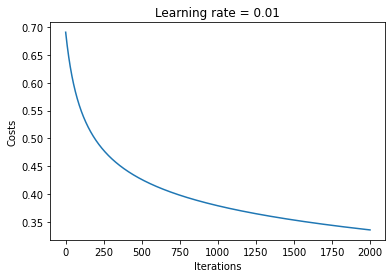

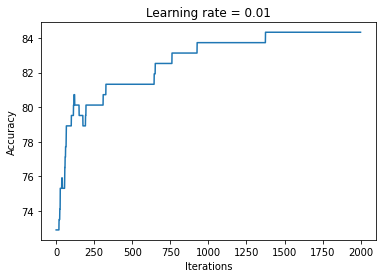

In [223]:
from sklearn.metrics import accuracy_score
epochs,print_freq = 2000,100
costs = []
acc = []

W,b = initialze_weights()

for epoch in range(epochs):
    grads = grad1(X_train,y_train)
    optimizer.apply_gradients(zip(grads,[W,b]))

    y_pred = logistic_regression(X_train)
    loss = cross_entropy(y_train,y_pred)
    costs.append(loss)

    preds = tf.cast(tf.argmax(y_pred,axis=1), dtype=tf.float32)
    actual = tf.cast(tf.argmax(y_train,axis=1), dtype=tf.float32)
    acc1 = accuracy_score(actual,preds)*100
    acc.append(acc1)
    if print_freq and epoch % print_freq == 0:
        print("Epoch: %i, loss: %f, accuracy: %f" % (epoch,loss,acc1))
    pass

test_accuracy()
costs_plot()
accuracy_plot()

In [0]:
import matplotlib.pyplot as plt

def costs_plot():
    plt.plot(costs)
    plt.ylabel("Costs")
    plt.xlabel("Iterations")
    plt.title(f"Learning rate = {alpha}")
    plt.show()
    pass

In [0]:
def accuracy_plot():
    plt.plot(acc)
    plt.ylabel("Accuracy")
    plt.xlabel("Iterations")
    plt.title(f"Learning rate = {alpha}")
    plt.show()
    pass

In [0]:
def test_accuracy():
    y_test_pred = logistic_regression(X_test)

    test_pred = tf.cast(tf.argmax(y_test_pred,axis=1), dtype=tf.float32)
    test_actual = tf.cast(tf.argmax(y_test,axis=1), dtype=tf.float32)

    acc_test = accuracy_score(test_actual,test_pred)
    print("Accuracy: %f",(acc_test*100))
    pass